In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
#Basic functions contruction
def volatility(close):
    log_rets = np.log(close/close.shift())
    return log_rets.std() * 250**0.5

def parkinson_volatility(high, low):
    log_hl = np.log(high / low)
    squared_log_hl = log_hl ** 2
    factor = 1 / (4 * np.log(2))
    parkinson_vol = np.sqrt(factor * squared_log_hl.mean())
    return parkinson_vol * 250**0.5

In [3]:
#Get CEDEARS tickers
string = open("CEDEARS.txt")
string = string.read().replace("\n" , " ")
string

'SPYD.BA TSLAD.BA AAPLD.BA ADBED.BA ADGOD.BA NVDAD.BA PYPLD.BA BABAD.BA AMDD.BA AEMD.BA DIAD.BA QQQD.BA MSFTD.BA AMZND.BA GOGLD.BA NIOD.BA BRKBD.BA AMGND.BA AVGOD.BA XLFD.BA JNJD.BA COIND.BA METAD.BA PBRD.BA DISND.BA BAD.BA BBDD.BA INTCD.BA EWZD.BA XLED.BA VALED.BA IWMD.BA BA.CD.BA BIOXD.BA BITFD.BA TEND.BA CVXD.BA FSLRD.BA GLOBD.BA UPSTD.BA MCDD.BA ARKKD.BA CD.BA MSTRD.BA GOLDD.BA IBMD.BA VD.BA JMIAD.BA NKED.BA UNHD.BA JDD.BA HUTD.BA JPMD.BA TSMD.BA GILDD.BA KOD.BA NFLXD.BA LLYD.BA MELID.BA MMMD.BA BIDUD.BA PEPD.BA PAASD.BA OXYD.BA PFED.BA PGD.BA XD.BA QCOMD.BA HMYD.BA RIOD.BA HSYD.BA CSCOD.BA SBUXD.BA EEMD.BA SONYD.BA ORCLD.BA NUD.BA PLTRD.BA LACD.BA AAPD.BA MUXD.BA PAGSD.BA STNED.BA MRVLD.BA SHPWD.BA SDAD.BA AALD.BA TMD.BA DESPD.BA MOD.BA DED.BA CATD.BA SQD.BA BNGD.BA COSTD.BA RTXD.BA TXRD.BA TXND.BA ETSYD.BA LYGD.BA TD.BA FD.BA USBD.BA SLBD.BA AXPD.BA CRMD.BA VISTD.BA SHOPD.BA WBAD.BA DOWD.BA BRFSD.BA ZMD.BA GGBD.BA GED.BA PKSD.BA DEOD.BA SPGID.BA VODD.BA ABNBD.BA HALD.BA ABBVD.BA 

In [4]:
#download dataframe from yfinance with information of last 3 months
market=yf.Tickers(string)
stocks_df = market.history(period="3mo")

[*                      3%%                      ]  15 of 458 completed

$BKD.BA: possibly delisted; No price data found  (period=3mo)


[***                    6%%                      ]  28 of 458 completed

$HOND.BA: possibly delisted; No price data found  (period=3mo)


[****                   8%%                      ]  38 of 458 completed

$UGPD.BA: possibly delisted; No price data found  (period=3mo)


[**************        30%%                      ]  137 of 458 completed

$ADID.BA: possibly delisted; No price data found  (period=3mo)


[****************      34%%                      ]  154 of 458 completed

$HPQD.BA: possibly delisted; No price data found  (period=3mo)


[**********************62%%****                  ]  285 of 458 completed

$BRFSD.BA: possibly delisted; No price data found  (period=3mo)


[**********************78%%***********           ]  358 of 458 completed

$YYD.BA: possibly delisted; No price data found  (period=3mo)


[**********************84%%**************        ]  385 of 458 completed

$CBRDD.BA: possibly delisted; No price data found  (period=3mo)


[**********************94%%*******************   ]  429 of 458 completed

$AIGD.BA: possibly delisted; No price data found  (period=3mo)


[**********************94%%*******************   ]  432 of 458 completed

$HWMD.BA: possibly delisted; No price data found  (period=3mo)


[*********************100%%**********************]  458 of 458 completed

123 Failed downloads:
['HSY.BA', 'NIO.BA', 'TWLO.BA', 'RACED.BA', 'TEFO.BA', 'WBA.BA', 'DOCU.BA', 'ZM.BA', 'MRVLD.BA', 'CVSD.BA', 'AAL.BA', 'BMYD.BA', 'RIOTD.BA', 'SED.BA', 'SHOP.BA', 'VIST.BA', 'GPRK.BA', 'BRKBD.BA', 'TWLOD.BA', 'GGBD.BA', 'SE.BA', 'XLED.BA', 'AVGO.BA', 'TEN.BA', 'LRCXD.BA', 'EA.BA', 'PAASD.BA', 'DALD.BA', 'MA.BA', 'DOWD.BA', 'SNOW.BA', 'COIND.BA', 'DDD.BA', 'PBR.BA', 'NIOD.BA', 'SDA.BA', 'CAAP.BA', 'MDLZD.BA', 'PKS.BA', 'SPOT.BA', 'STLAD.BA', 'META.BA', 'YY.BA', 'GMD.BA', 'ACND.BA', 'QQQD.BA', 'GM.BA', 'CCLD.BA', 'NUD.BA', 'HAL.BA', 'NTES.BA', 'DOW.BA', 'SPGID.BA', 'PLTRD.BA', 'LACD.BA', 'LRCX.BA', 'UNP.BA', 'ETSY.BA', 'PSX.BA', 'UNH.BA', 'SQ.BA', 'PAGS.BA', 'COIN.BA']: YFInvalidPeriodError("%ticker%: Period '3mo' is invalid, must be one of ['1d', '5d']")
['GFID.BA', 'SCHW.BA', 'TEFOD.BA', 'CDED.BA', 'AEGD.BA', 'MSID.BA', 'SCHWD.BA', 'ROKUD.BA', 'AAPD.BA', 'DEOD.BA', 'BA.C.BA', 'SHPWD.BA', 'IBN

In [5]:
#Create our main dataframe to work with
pv = parkinson_volatility(stocks_df['High'], stocks_df['Low'])
v = volatility(stocks_df['Close'])

v_df = pv.to_frame(name="Parkinson_Volatility")
v_df["Volatility"] = v
v_df["Difference"] = pv - v 
v_df.head()

,Parkinson_Volatility,Volatility,Difference
Ticker,,,
AAL.BA,NaN,NaN,NaN
AALD.BA,0.508317,0.493308,0.015009
AAP.BA,0.533791,0.596156,-0.062364
AAPD.BA,NaN,NaN,NaN
AAPL.BA,0.292920,0.278479,0.014442


In [6]:
print("Data loss after dropn NaN: " , len(v_df.dropna())/ len(v_df))
print("Number of stocks remaining: " , len(v_df))
v_df.dropna(inplace=True)

Data loss after dropn NaN:  0.6877729257641921
Number of stocks remaining:  458


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt 

#This function have 2 parameters: dif and v 
#Return TOP-20 stocks with Difference(pv - v) > dif and Volatility < v
#in others words this function helps the user to find the stocks with a minimum Difference given an upper bound of volatility

def find_ticker(dif , v):

    df = v_df[(v_df.Difference > 0) & (v_df.Difference > dif) & (v_df.Volatility < v)]
    if len(df)==0:
        return print("No stocks funded")
    plt.figure(figsize=(24,12))
    plt.title(f"Difference between Volatility and Parkinson volatility TOP-20 (Difference > {dif} , Volatility < {v})")
    sns.barplot(df.Difference.sort_values(ascending=False).head(20))

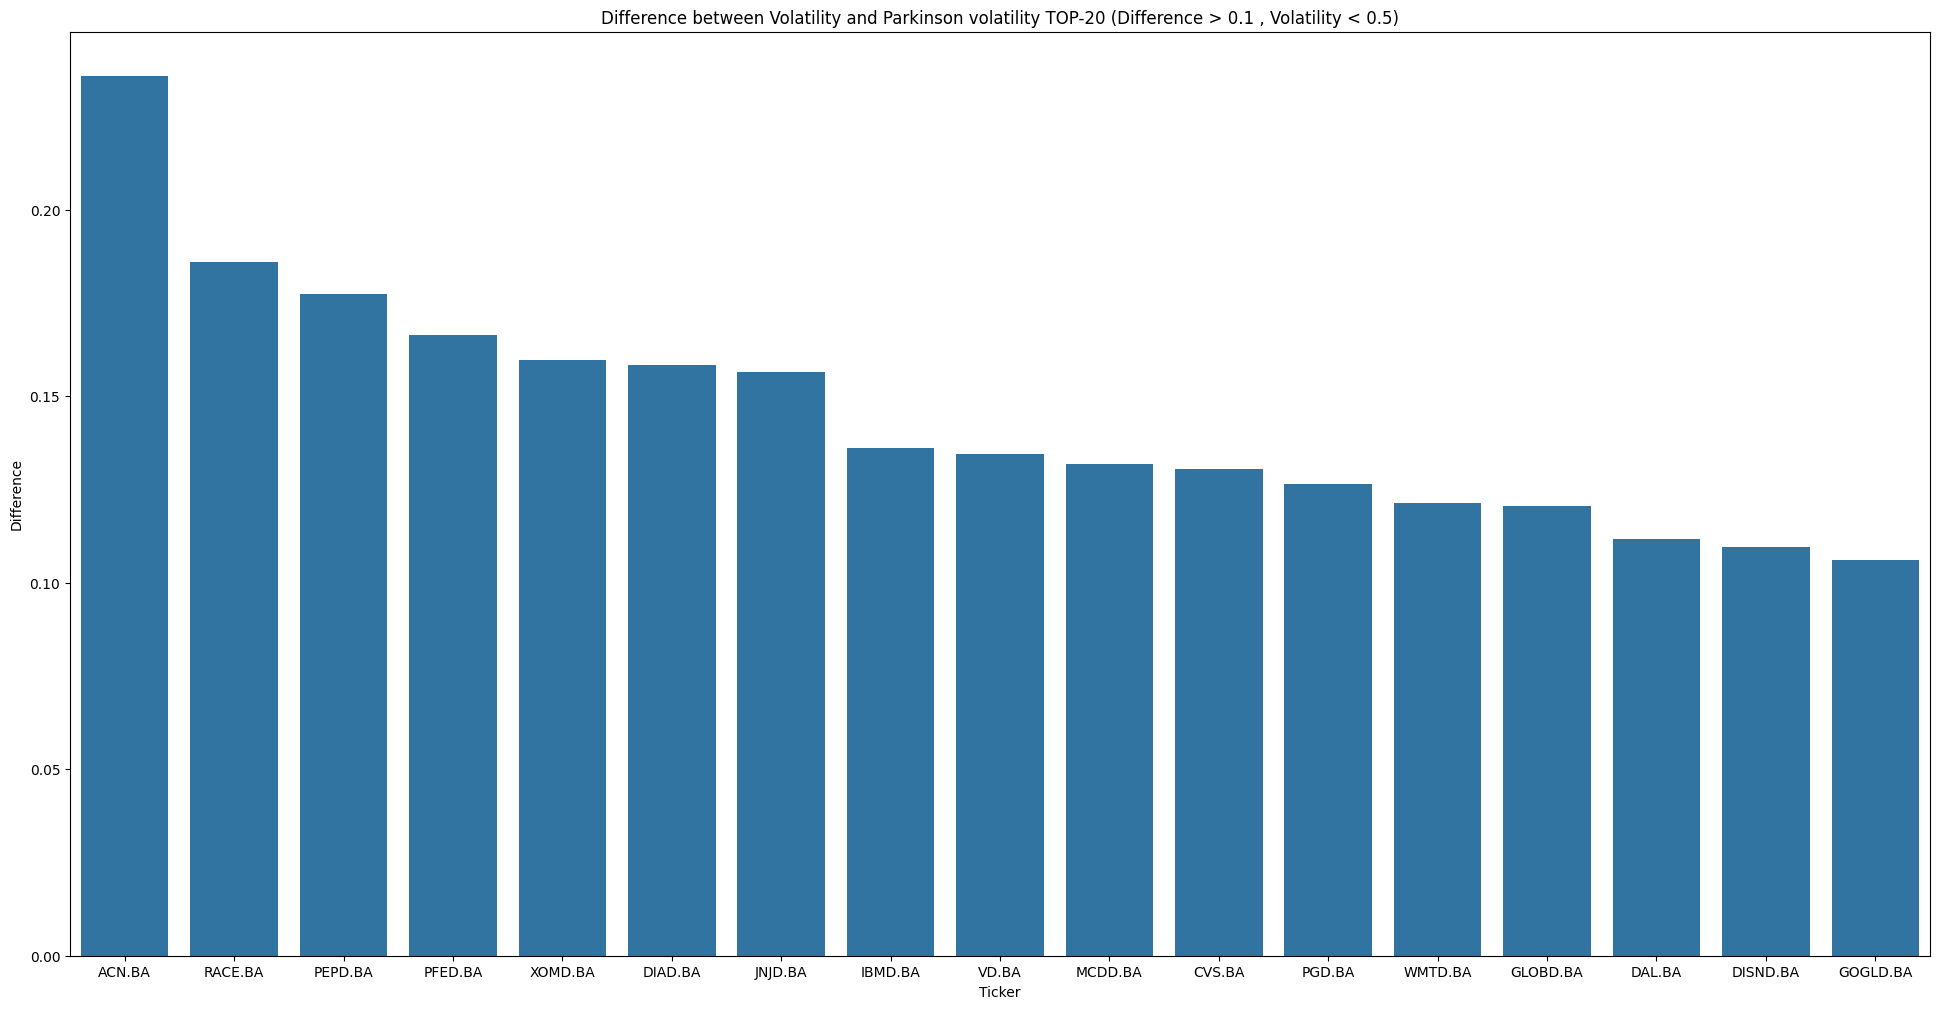

In [8]:
find_ticker(0.1 , 0.5)

In [9]:
import pickle 

pickle.dump(find_ticker , open("find_ticker" , "wb"))